In [70]:
import pandas as pd

df = pd.read_excel('/Users/andreasbrogaard/Documents/dsp_project/dsp_project/Data Collection/gpt_response_clean.xlsx')


df = df[['Type', 'Ask.price', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Monthly_ownership_cost.1', 'Price_range', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
df.head()




,Type,Ask.price,Year_built,Energy_rating,Monthly_ownership_cost,Days_desc,Municipality,Rooms,Monthly_ownership_cost.1,Price_range,...,Balcony,Garden,Parking,Swimming pool,Fireplace,Garage,Basement,Elevator,Air_conditioning,Heating_type
0,Villa,2499000,1911.0,D,2466,51-100,Tranbjerg J,3.0,17599.0,2000000-2500000,...,True,True,True,False,True,True,False,False,False,not_stated
1,Ejerlejlighed,3495000,1930.0,D,3918,21-50,Aarhus C,3.0,41607.0,3000000-3500000,...,False,False,False,False,False,False,False,False,False,not_stated
2,Villa,2748000,1970.0,D,2638,100+,Tilst,4.0,19629.0,2500000-3000000,...,False,True,True,False,False,False,False,False,False,not_stated
3,Villa,3650000,1900.0,A2010,3204,1-10,Solbjerg,4.0,17548.0,3500000-4000000,...,False,True,False,False,True,False,False,False,False,not_stated
4,Ejerlejlighed,1199000,1970.0,B,2050,1-10,Viby J,2.0,17896.0,1000000-1500000,...,False,False,False,False,False,False,False,False,False,not_stated


In [61]:
na_rows = df[df.isna().any(axis=1)]
na_indices = na_rows.index.tolist()
print("NA rows:")
print(na_rows)
print("NA row indices:")
print(na_indices)


NA rows:
            Type  Ask.price  Year_built Energy_rating  Monthly_ownership_cost  \
32   Helårsgrund    2995000         NaN           NaN                    1270   
86    Fritidshus    3198000      1981.0           NaN                    2889   
119  Helårsgrund    2295000         NaN           NaN                     448   
120  Helårsgrund    2295000         NaN           NaN                     454   
121  Helårsgrund    2295000         NaN           NaN                     537   
143   Fritidshus    7998000      1986.0           NaN                    3691   
163  Helårsgrund    2498000         NaN           NaN                    1045   
184   Fritidshus    3198000      1964.0           NaN                    2877   

    Time_for_sale Municipality  Rooms  Monthly_ownership_cost.1  \
32        19 dage     Højbjerg    NaN                       NaN   
86        55 dage          Egå    3.0                   41532.0   
119       85 dage  Tranbjerg J    NaN                       

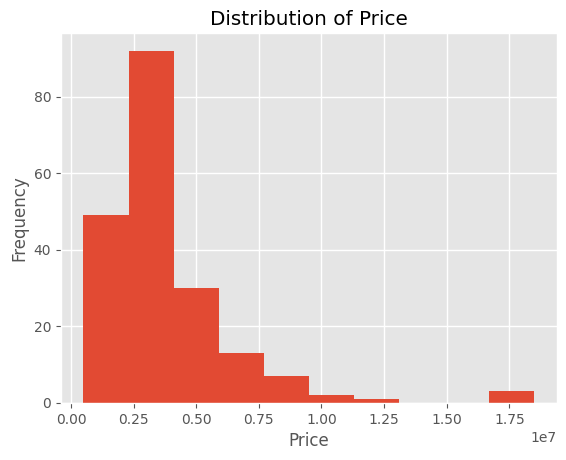

In [62]:
import matplotlib.pyplot as plt

df['Ask.price'].plot(kind='hist', bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


The output shows a right skewed we are logging the input into our model

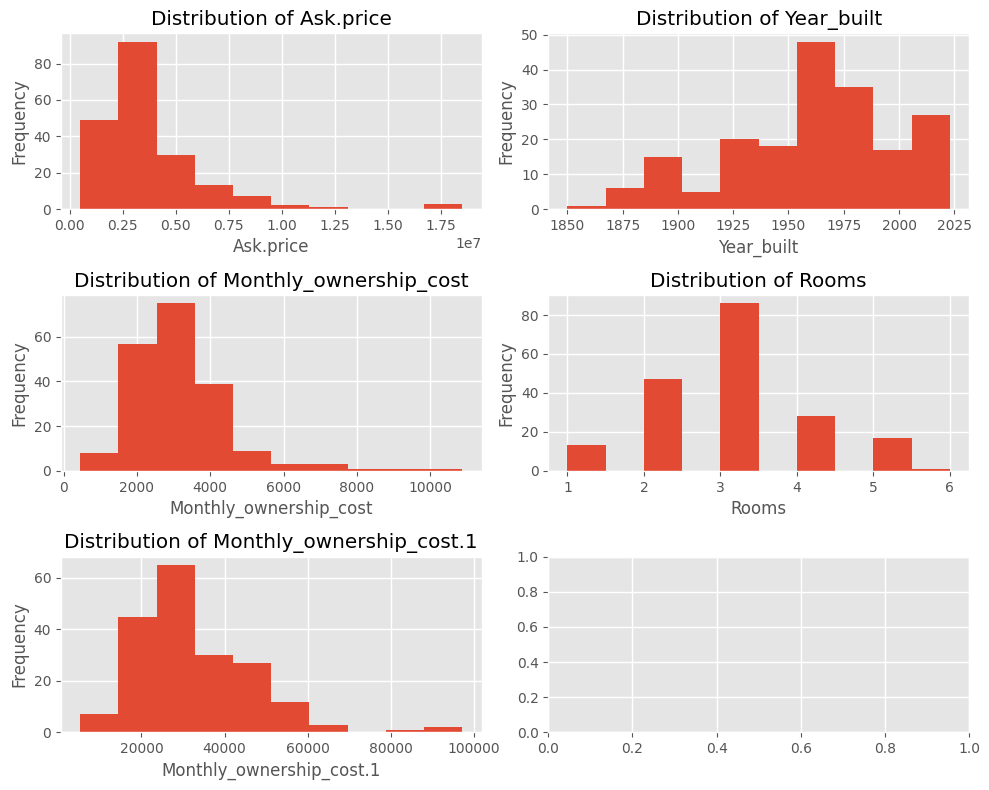

In [71]:
import numpy as np
import matplotlib.pyplot as plt
num_rows = np.ceil(num_columns / 2).astype(int)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 8))

# Iterate over the columns of the DataFrame
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    # Calculate the row and column index for the current subplot
    row = i // 2
    col = i % 2
    
    # Plot the histogram in the current subplot
    df[column].plot(kind='hist', bins=10, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
correlation = df['Ask.price'].corr(df['Monthly_ownership_cost'])
correlation


0.8093970013262882

/Users/andreasbrogaard/Documents/dsp_project/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


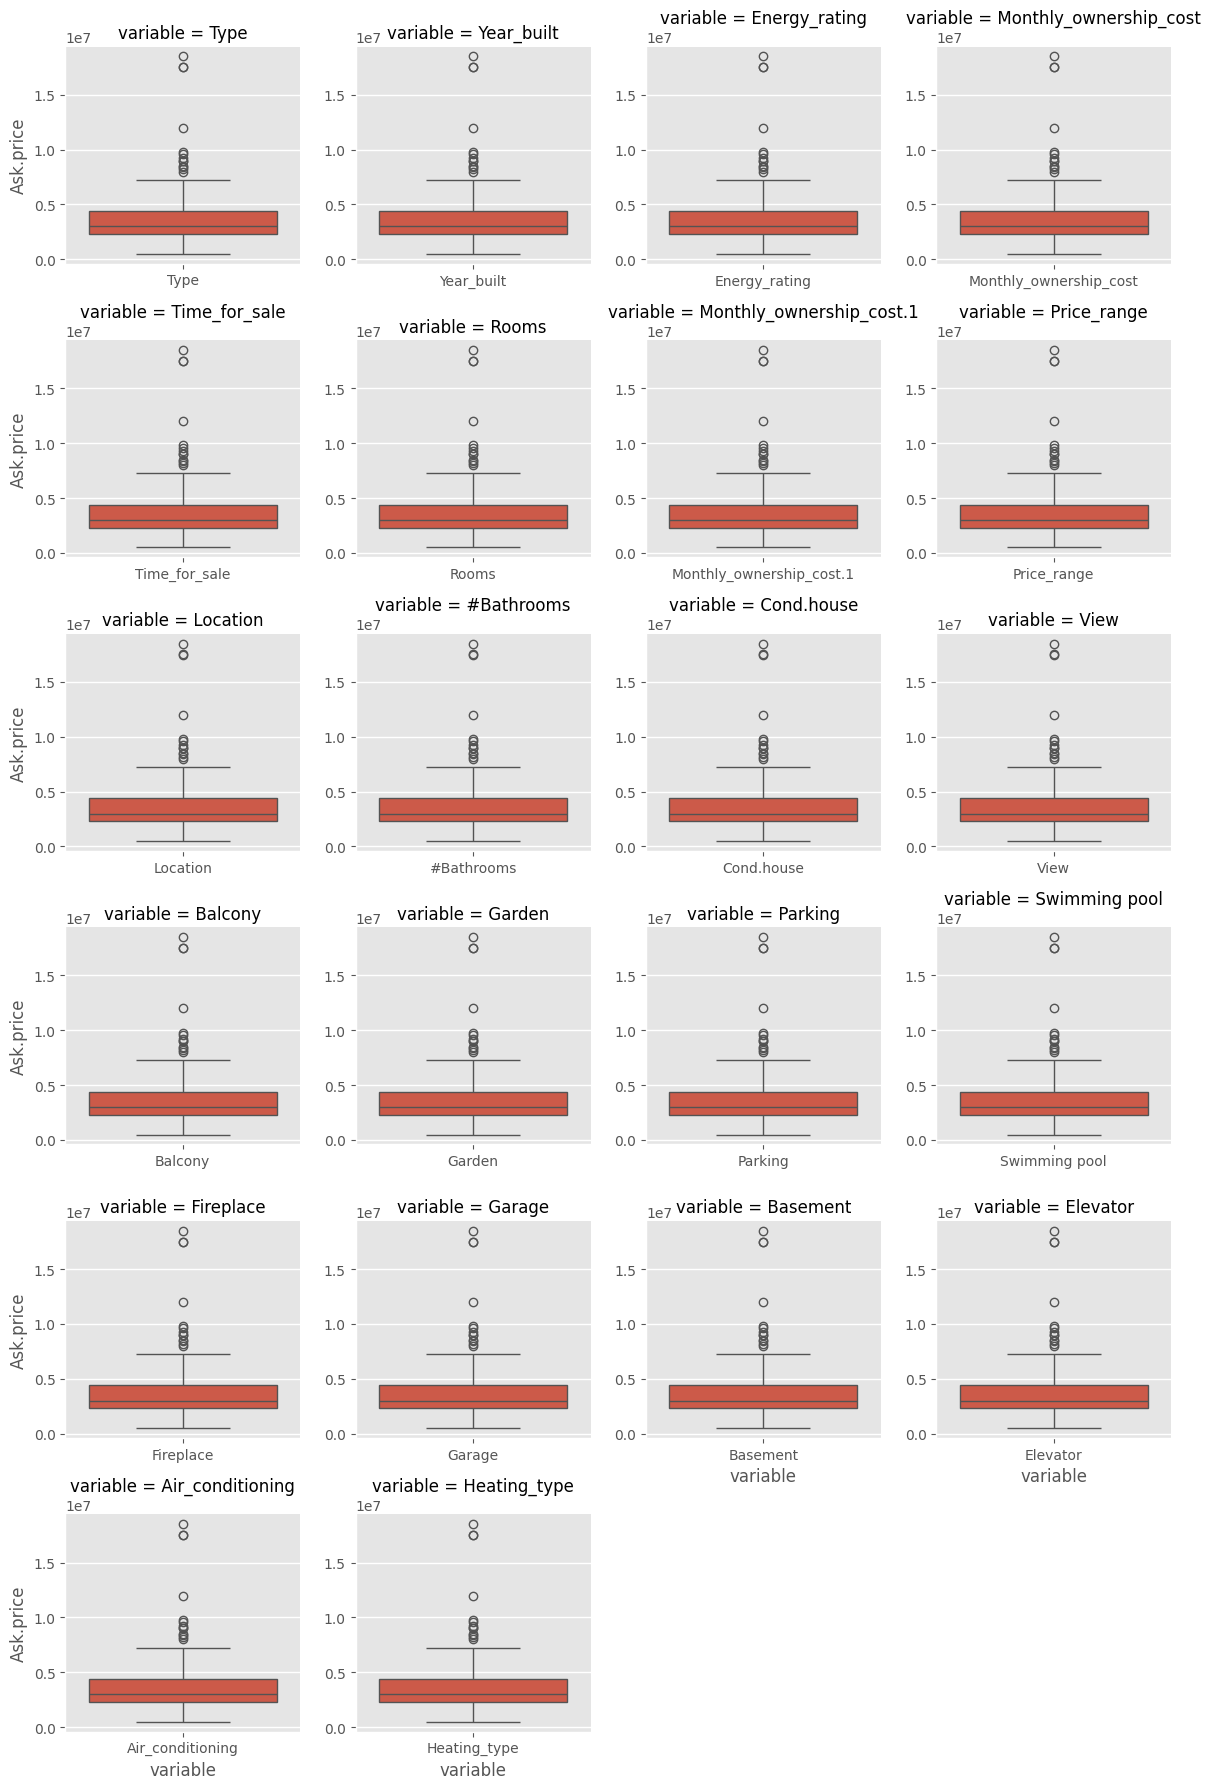

In [64]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataframe (df)

# Remove 'Ask.price' from the list of variables to create a boxplot for each of the others
variable_names = ['Type', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Time_for_sale', 'Rooms', 'Monthly_ownership_cost.1', 'Price_range', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']

# Melt the DataFrame to have 'variable' and 'value' columns
df_long = df.melt(id_vars='Ask.price', value_vars=variable_names, var_name='variable', value_name='value')

# Now create a FacetGrid
f = sns.FacetGrid(df_long, col='variable', col_wrap=4, sharey=False, sharex=False)
f.map(sns.boxplot, 'variable', 'Ask.price')

# This finalizes and shows the plot
plt.show()


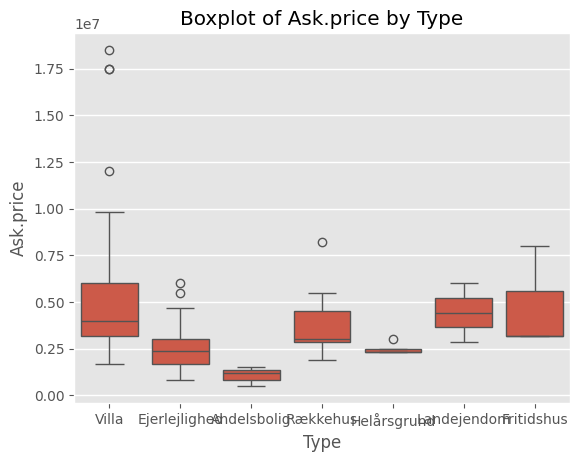

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(data=df, x='Type', y='Ask.price')

# Set the labels and title
plt.xlabel('Type')
plt.ylabel('Ask.price')
plt.title('Boxplot of Ask.price by Type')

# Show the plot
plt.show()


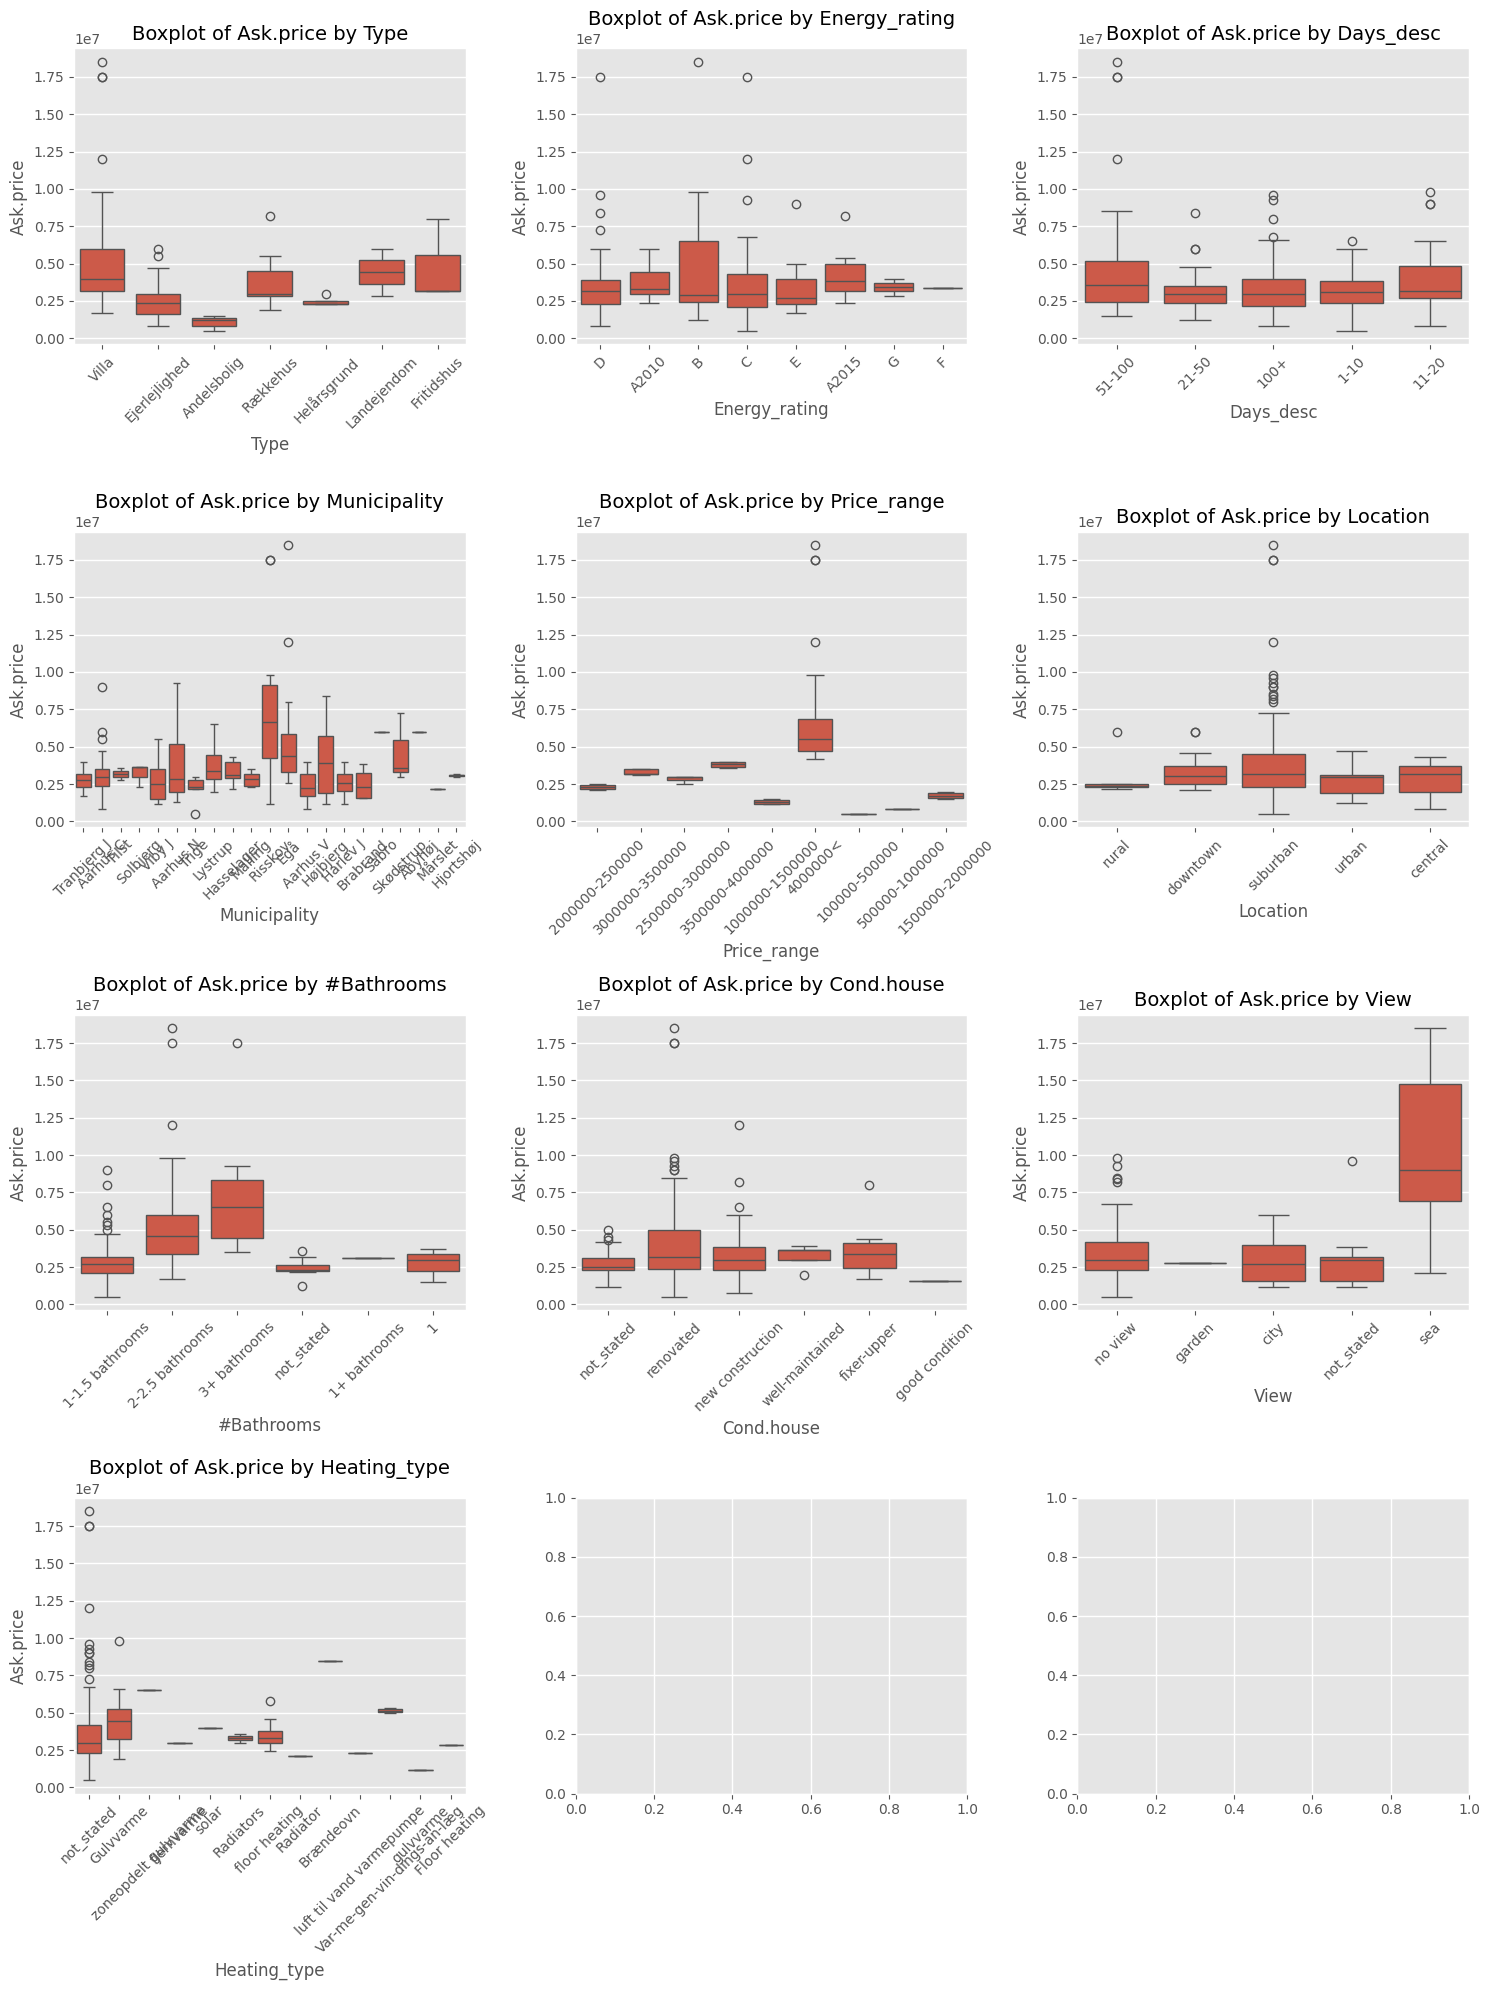

In [74]:
# Create the grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))  # Increase the height of the figure

# Iterate over the categorical variables and create boxplots
for i, var in enumerate(categorical_vars):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols
    
    # Create the boxplot in the current subplot
    sns.boxplot(data=df, x=var, y='Ask.price', ax=axes[row, col])
    axes[row, col].set_xlabel(var, fontsize=12)  # Set font size
    axes[row, col].set_ylabel('Ask.price', fontsize=12)  # Set font size
    axes[row, col].set_title(f'Boxplot of Ask.price by {var}', fontsize=14)  # Set font size
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
